In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import pandas as pd
import numpy as np
import math 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import yfinance as yf 
%matplotlib inline
plt.style.use('fivethirtyeight')

In [ ]:
nio = yf.Ticker('NIO')
nio.info

{'52WeekChange': -0.53771293,
 'SandP52WeekChange': -0.06478733,
 'address1': 'Building 20',
 'address2': 'No. 56 AnTuo Road Anting Town Jiading District',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 20.13,
 'askSize': 2900,
 'averageDailyVolume10Day': 40175740,
 'averageVolume': 62617640,
 'averageVolume10days': 40175740,
 'beta': 1.970026,
 'beta3Year': None,
 'bid': 20.11,
 'bidSize': 3100,
 'bookValue': 20.889,
 'category': None,
 'circulatingSupply': None,
 'city': 'Shanghai',
 'coinMarketCapLink': None,
 'companyOfficers': [],
 'country': 'China',
 'currency': 'USD',
 'currentPrice': 20.22,
 'currentRatio': 2.015,
 'dateShortInterest': 1657843200,
 'dayHigh': 20.68,
 'dayLow': 19.88,
 'debtToEquity': 58.929,
 'dividendRate': None,
 'dividendYield': None,
 'earningsGrowth': None,
 'earningsQuarterlyGrowth': None,
 'ebitda': -4515644416,
 'ebitdaMargins': -0.11863,
 'enterpriseToEbitda': -2.256,
 'enterpriseToRevenue': 0.268,
 'en

In [ ]:
history = nio.history(period="Max")
df = pd.DataFrame(history)
df.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-09-12,6.00,6.93,5.35,6.60,66849000,0,0
2018-09-13,6.62,12.69,6.52,11.60,158346500,0,0
2018-09-14,12.66,13.80,9.22,9.90,172473600,0,0
2018-09-17,9.61,9.75,8.50,8.50,56323900,0,0
2018-09-18,8.73,9.10,7.67,7.68,41827600,0,0
2018-09-19,7.88,9.15,7.54,8.50,48306500,0,0
2018-09-20,9.07,9.47,8.42,8.78,40275000,0,0
2018-09-21,9.05,9.07,8.50,8.59,15118500,0,0
2018-09-24,8.32,8.39,7.85,7.87,16297900,0,0


In [ ]:
df.shape

(982, 7)

In [ ]:
x = df.index
y = df['Close']
y

Date
2018-09-12     6.600000
2018-09-13    11.600000
2018-09-14     9.900000
2018-09-17     8.500000
2018-09-18     7.680000
                ...    
2022-08-01    20.180000
2022-08-02    20.180000
2022-08-03    20.299999
2022-08-04    20.900000
2022-08-05    20.219999
Name: Close, Length: 982, dtype: float64

In [ ]:
def df_plot(data, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

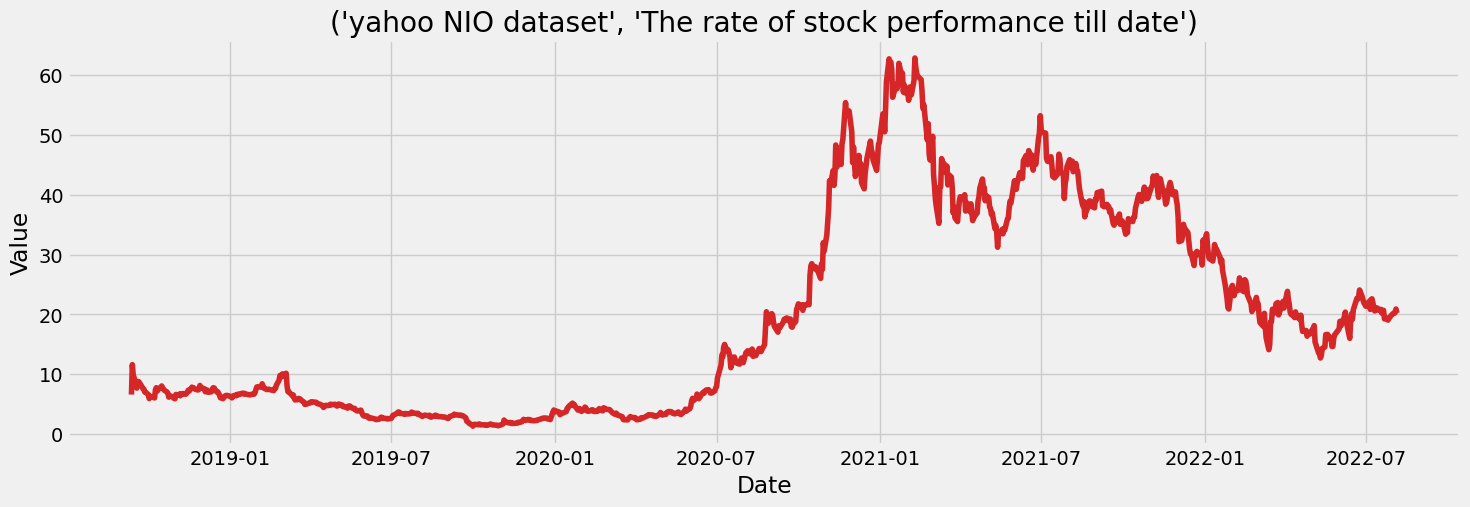

In [ ]:
stock_name= "yahoo NIO dataset"
title = (stock_name,"The rate of stock performance till date")
df_plot(df , x , y , title=title,xlabel='Date', ylabel='Value',dpi=100)

# **Multiple Regression**

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-09-12,6.00,6.93,5.35,6.60,66849000,0,0
1,2018-09-13,6.62,12.69,6.52,11.60,158346500,0,0
2,2018-09-14,12.66,13.80,9.22,9.90,172473600,0,0
3,2018-09-17,9.61,9.75,8.50,8.50,56323900,0,0
4,2018-09-18,8.73,9.10,7.67,7.68,41827600,0,0
5,2018-09-19,7.88,9.15,7.54,8.50,48306500,0,0
6,2018-09-20,9.07,9.47,8.42,8.78,40275000,0,0
7,2018-09-21,9.05,9.07,8.50,8.59,15118500,0,0
8,2018-09-24,8.32,8.39,7.85,7.87,16297900,0,0
9,2018-09-25,8.06,8.19,7.50,7.58,18909300,0,0


In [ ]:
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [ ]:
df.drop(columns=['Dividends','Stock Splits']).head(2)

,Date,Open,High,Low,Close,Volume
0,2018-09-12,6.00,6.93,5.35,6.6,66849000
1,2018-09-13,6.62,12.69,6.52,11.6,158346500


In [ ]:
df['Date'] = pd.to_datetime(df.Date)

In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,982.000000,982.000000,982.000000,982.000000,9.820000e+02,982.0,982.0
mean,19.619012,20.241874,18.928483,19.602179,6.580852e+07,0.0,0.0
std,16.997291,17.466657,16.428885,16.964081,6.369750e+07,0.0,0.0
min,1.190000,1.450000,1.190000,1.320000,5.111000e+06,0.0,0.0
25%,4.207500,4.400000,4.012500,4.252500,2.794815e+07,0.0,0.0
50%,14.310000,14.835000,13.615000,14.165000,5.000115e+07,0.0,0.0
75%,35.759999,36.647501,34.925000,35.797502,7.828012e+07,0.0,0.0
max,64.949997,66.989998,62.189999,62.840000,5.771851e+08,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          982 non-null    datetime64[ns]
 1   Open          982 non-null    float64       
 2   High          982 non-null    float64       
 3   Low           982 non-null    float64       
 4   Close         982 non-null    float64       
 5   Volume        982 non-null    int64         
 6   Dividends     982 non-null    int64         
 7   Stock Splits  982 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 61.5 KB


In [ ]:
print(len(df))

982


In [ ]:
x = df[['Open', 'High','Low', 'Volume']]
y = df['Close']

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.15 , shuffle=False,random_state = 0)

In [ ]:
print(train_x.shape )
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(834, 4)
(148, 4)
(834,)
(148,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regression = LinearRegression()
regression.fit(train_x, train_y)
print("regression coefficient",regression.coef_)
print("regression intercept",regression.intercept_)

regression coefficient [-6.85638989e-01  9.79052047e-01  7.01135159e-01 -4.10783296e-10]
regression intercept 0.0007910314824783882


In [ ]:
regression_confidence = regression.score(test_x, test_y)
print("Multiple regression Accuracy: ", regression_confidence)

Multiple regression Accuracy:  0.9858168401500714


In [ ]:
predicted=regression.predict(test_x)
print(test_x.head())

          Open       High        Low    Volume
834  33.349998  33.389999  31.110001  47866800
835  30.969999  31.940001  29.780001  42442700
836  30.010000  30.540001  28.280001  48723200
837  29.450001  30.420000  28.780001  40781500
838  29.000000  29.160000  27.780001  44833600


In [ ]:
predicted.shape

(148,)

In [ ]:
dfr=pd.DataFrame({'Actual_Price':test_y, 'Predicted_Price':predicted})
dfr.head(10)

,Actual_Price,Predicted_Price
834,31.580000,31.617931
835,29.879999,30.899846
836,29.309999,29.133103
837,29.299999,29.753404
838,28.910000,28.125536
839,30.020000,29.966731
840,31.680000,31.051600
841,30.480000,30.818613
842,30.950001,30.979376
843,29.610001,30.413489


In [ ]:
dfr.describe()

,Actual_Price,Predicted_Price
count,148.000000,148.000000
mean,20.799054,20.860706
std,4.003098,4.037597
min,12.710000,13.054061
25%,18.137499,18.310081
50%,20.440000,20.501176
75%,22.615000,22.797134
max,31.680000,31.617931


In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_y, predicted))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(test_y, predicted))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(test_y, predicted)))

Mean Absolute Error (MAE): 0.37848965683910984
Mean Squared Error (MSE) : 0.2257464986507686
Root Mean Squared Error (RMSE): 0.47512787610365337


In [ ]:
x2 = dfr.Actual_Price.mean()
y2 = dfr.Predicted_Price.mean()
Accuracy1 = x2/y2*100
print("The accuracy of the model is " , Accuracy1)

The accuracy of the model is  99.7044601084419


In [ ]:
from sklearn import metrics
MLR_score=metrics.r2_score(test_y, regression.predict(test_x))
MLR_score

0.9858168401500714

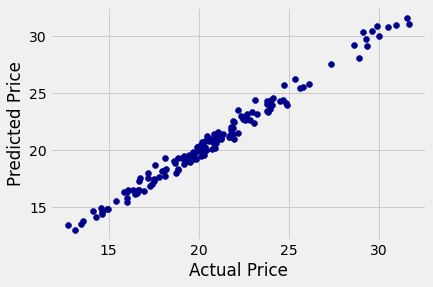

In [ ]:
plt.scatter(dfr.Actual_Price, dfr.Predicted_Price,  color='Darkblue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

No handles with labels found to put in legend.


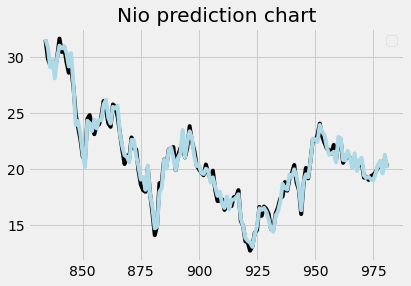

In [ ]:
plt.plot(dfr.Actual_Price, color='black')
plt.plot(dfr.Predicted_Price, color='lightblue')
plt.title("Nio prediction chart")
plt.legend();

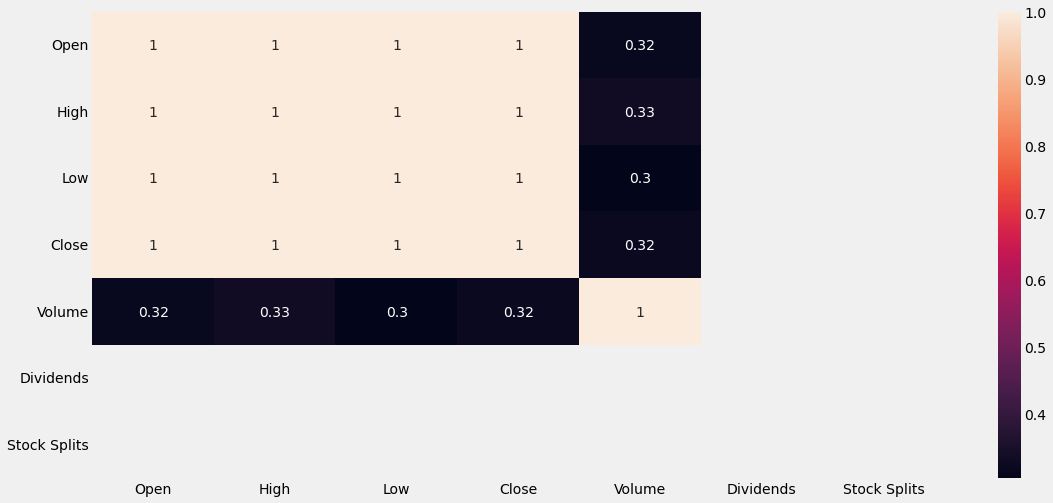

In [ ]:
import seaborn as sns
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(df.corr(), annot = True)

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
import datetime

In [ ]:
NUM_DAYS = 10000     # The number of days of historical data to retrieve
INTERVAL = '1d'     # Sample rate of historical data
symbol = 'SPY'      # Symbol of the desired stock

# List of symbols for technical indicators
INDICATORS = ['RSI', 'MACD', 'STOCH','ADL', 'ATR', 'MOM', 'MFI', 'ROC', 'OBV', 'CCI', 'EMV', 'VORTEX']

[*********************100%***********************]  1 of 1 completed
                 open       high        low      close  Adj Close  volume
Date                                                                     
1995-03-21  49.562500  49.875000  49.359375  49.437500  30.287693  104400
1995-03-22  49.531250  49.531250  49.328125  49.484375  30.316408   74900
1995-03-23  49.421875  49.656250  49.359375  49.515625  30.335550  220500
1995-03-24  49.671875  50.218750  49.671875  50.218750  30.766319  134000
1995-03-27  50.296875  50.421875  50.171875  50.421875  30.890760  132100


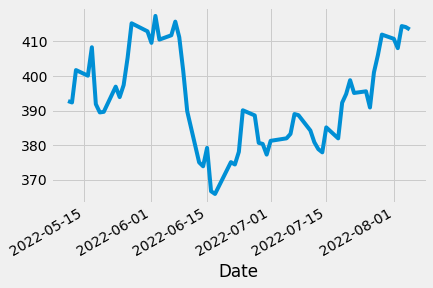

In [ ]:
start = (datetime.date.today() - datetime.timedelta( NUM_DAYS ) )
end = datetime.datetime.today()

data = yf.download(symbol, start=start, end=end, interval=INTERVAL)
data.rename(columns={"Close": 'close', "High": 'high', "Low": 'low', 'Volume': 'volume', 'Open': 'open'}, inplace=True)
print(data.head())

tmp = data.iloc[-60:]
tmp['close'].plot()

# **Decision Tree**

In [ ]:
x = df[['Open', 'High','Low', 'Volume']]
y = df['Close']

In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
print(train_y)

0       6.600000
1      11.600000
2       9.900000
3       8.500000
4       7.680000
         ...    
829    29.629999
830    28.250000
831    32.419998
832    31.680000
833    33.470001
Name: Close, Length: 834, dtype: float64


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.15 , shuffle=False,random_state = 0)

In [ ]:
reg= DecisionTreeRegressor(random_state=0)
reg.fit(train_x,train_y)

DecisionTreeRegressor(random_state=0)

In [ ]:

y_pred = reg.predict(test_x)


In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

Mean Absolute Error (MAE): 0.7509459869281666
Mean Squared Error (MSE) : 1.089798764440711
Root Mean Squared Error (RMSE): 1.0439342720883873


In [ ]:
from sklearn import metrics
DT_score=metrics.r2_score(test_y, reg.predict(test_x))
DT_score

0.9315303219642446

# **ADA BOOST**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor


DTR=DecisionTreeRegressor(max_depth=1)
RegModel = AdaBoostRegressor(n_estimators=50, base_estimator=DTR ,learning_rate=1)
print(RegModel)


AB=RegModel.fit(train_x,train_y)
prediction=AB.predict(test_x)





AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1),
                  learning_rate=1)


In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_y,prediction))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(test_y, prediction))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(test_y, prediction)))

Mean Absolute Error (MAE): 12.842690247728314
Mean Squared Error (MSE) : 173.13629367764827
Root Mean Squared Error (RMSE): 13.158126526130088


In [ ]:
from sklearn import metrics
AB_score=metrics.r2_score(train_y, AB.predict(train_x))
AB_score

0.8871285528588572

# **XG BOOST**

In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(train_x,train_y)

preds = xg_reg.predict(test_x)

[09:20:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, preds))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, preds))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, preds)))

Mean Absolute Error: 7.240694535745157
Mean Squared Error: 55.89823099617708
Root Mean Squared Error: 7.4765119538577


In [ ]:
from sklearn import metrics
xgb_score=metrics.r2_score(train_y,xg_reg.predict(train_x))
xgb_score

0.7157535583979072

# **random forest **

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred

array([12.07749972,  3.18550001,  7.56399994, 58.03699989, 37.95799923,
        6.79150009,  3.16850005,  2.36550002,  7.53299999, 14.64750023,
        7.27849994, 12.79949999, 13.44650006, 23.99099998,  2.59749998,
        6.17400012,  7.99449999, 20.12599983, 11.80499978,  5.97399995,
       38.2064991 ,  3.12850002, 43.677001  , 20.78550024,  6.43549995,
       39.48849983,  6.85250008, 19.38349991, 42.51699982, 37.19299984,
        6.2315001 , 15.12550015, 13.12250013, 50.30200062, 61.8220005 ,
       33.8949995 ,  2.91500002,  2.70049999, 20.67799988,  1.81000001,
       44.83549995, 37.17199955,  1.93800003,  3.74450003, 20.13800001,
        3.41350003, 50.38600044,  3.5865    , 38.51899986, 60.84749908,
       16.99449997,  2.40450007, 12.76849995,  1.585     ,  3.83499997,
        4.54700007,  3.30499996, 18.48700008,  2.92200001,  3.94500006,
        2.71200004,  4.54750001, 27.73400002, 21.00949984,  4.02950009,
       35.47749958, 13.73800001, 41.13250046,  1.97400002, 16.61

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3417715802713093
Mean Squared Error: 0.26729196014439643
Root Mean Squared Error: 0.5170028628009679


In [ ]:
Y_pred = regressor.predict(test_x)
Y_pred


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([62.24500084, 62.24500084, 62.24500084, 62.24500084, 62.24500084,
       62.24500084, 62.24500084, 62.24500084, 62.24500084, 62.24500084,
       62.24500084, 62.24500084, 62.24500084, 62.24500084, 62.24500084,
       62.24500084, 62.24500084, 62.24500084, 62.24500084, 62.24500084,
       62.24500084, 62.24500084, 62.24500084, 62.24500084, 62.24500084,
       62.24500084, 62.24500084, 62.24500084, 62.24500084, 62.24500084,
       62.24500084, 62.24500084, 62.24500084, 62.24500084, 62.24500084,
       62.24500084, 62.24500084, 62.24500084, 62.24500084, 62.24500084,
       62.24500084, 62.24500084, 62.24500084, 62.24500084, 62.24500084,
       62.24500084, 62.24500084, 62.24500084, 62.24500084, 62.24500084,
       62.24500084, 62.24500084, 62.24500084, 62.24500084, 62.24500084,
       62.24500084, 62.24500084, 62.24500084, 62.24500084, 62.24500084,
       62.24500084, 62.24500084, 62.24500084, 62.24500084, 62.24500084,
       62.24500084, 62.24500084, 62.24500084, 62.24500084, 62.24

In [ ]:
from sklearn import metrics
rfr_score=metrics.r2_score(y_test,regressor.predict(X_test))
rfr_score

0.9989930404879973

Text(0.5, 1.0, 'Regression Model Scores')

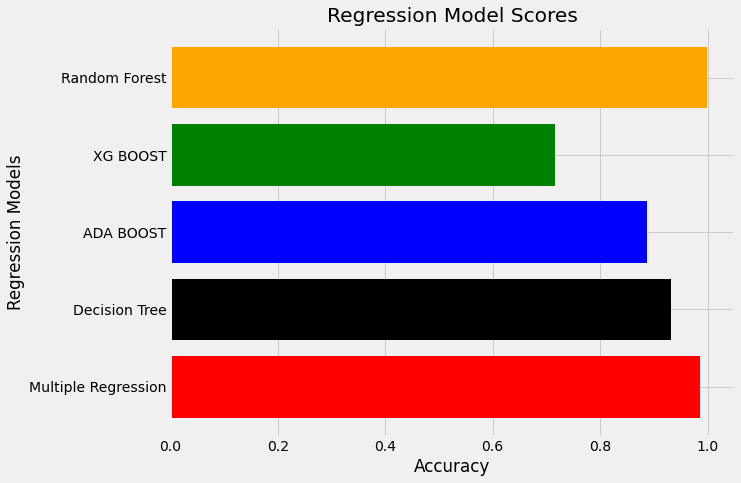

In [ ]:
model=['Multiple Regression','Decision Tree','ADA BOOST','XG BOOST','Random Forest']
accuracy=[MLR_score,DT_score,AB_score,xgb_score,rfr_score]

plt.figure(figsize=(9,7))
c = ['red', 'black', 'blue', 'green','orange']
plt.barh(model,accuracy,align='center',color=c)

plt.xlabel("Accuracy")
plt.ylabel("Regression Models")
plt.title("Regression Model Scores")

No handles with labels found to put in legend.


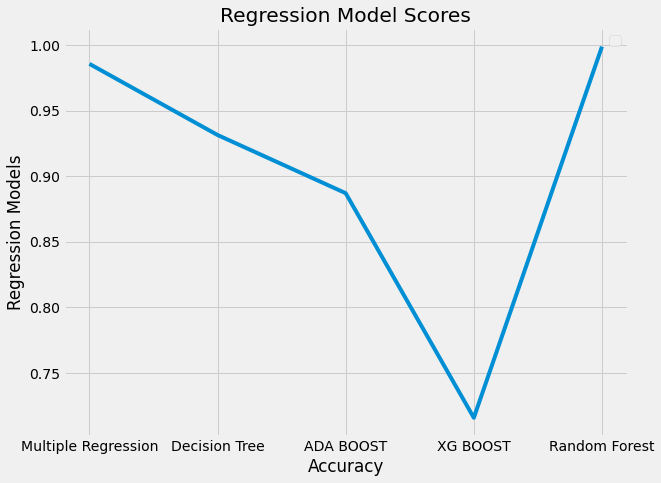

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

model=['Multiple Regression','Decision Tree','ADA BOOST','XG BOOST','Random Forest']
accuracy=[MLR_score,DT_score,AB_score,xgb_score,rfr_score]

plt.figure(figsize=(9,7))


plt.plot(model,accuracy)

plt.xlabel("Accuracy")
plt.ylabel("Regression Models")
plt.title("Regression Model Scores")
plt.legend()
plt.show()

In [ ]:
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Model","R2 score", "RMSE", "mean_absolute_error","mean_squared_error","Feature_name"]
x.add_row(["multiple_reg", "0.99", '0.538','0.428', '0.289','Close'])
x.add_row(["decision_tree", "0.97", '1.175','0.914', '1.380','Close'])
x.add_row(["ADA_boost", "0.89", '11.42','10.381', '130.53','Close'])
x.add_row(["XGboost'", "0.74", '12.33','11.851', '152.18','Close'])
x.add_row(["Random_forest", "0.99", '0.670','0.401', '0.449','Close'])
print(x)

+---------------+----------+-------+---------------------+--------------------+--------------+
|     Model     | R2 score |  RMSE | mean_absolute_error | mean_squared_error | Feature_name |
+---------------+----------+-------+---------------------+--------------------+--------------+
|  multiple_reg |   0.99   | 0.538 |        0.428        |       0.289        |    Close     |
| decision_tree |   0.97   | 1.175 |        0.914        |       1.380        |    Close     |
|   ADA_boost   |   0.89   | 11.42 |        10.381       |       130.53       |    Close     |
|    XGboost'   |   0.74   | 12.33 |        11.851       |       152.18       |    Close     |
| Random_forest |   0.99   | 0.670 |        0.401        |       0.449        |    Close     |
+---------------+----------+-------+---------------------+--------------------+--------------+
